In [1]:
import os
cwd = os.getcwd()

In [2]:
cwd

'C:\\Users\\audi'

In [4]:
import pandas as pd
import numpy as np
import csv
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math as mth
%matplotlib inline


## Cargo los dato a Phyton

In [6]:
base = pd.read_csv("regLin.csv")
base

,X,y
0,35.657897,28.074403
1,48.685931,36.674434
2,95.861773,67.903577
3,25.997253,11.931727
4,49.964772,30.286144
5,55.003337,44.274354
6,78.375881,49.032737
7,15.286028,13.862727
8,81.066092,55.742546
9,35.059204,30.345383


## Describo los Datos

In [7]:
base.describe()

,X,y
count,1029.000000,1029.000000
mean,50.008111,32.893917
std,29.055066,18.083566
min,0.030369,-4.586608
25%,25.201087,17.583093
50%,50.884987,33.564129
75%,75.636823,48.339811
max,99.959580,71.762748


## Divido los datos en entrenamiento (75%) y prueba  (25%)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(base[["X"]],base[["y"]],train_size=0.75)

In [9]:
Y_test

,y
126,50.785602
593,38.011735
97,39.168495
690,41.725227
1013,55.690169
943,6.958857
156,14.843095
181,61.348851
32,56.109347
944,37.497846


## Grafico los datos de entrenamiento X contra y

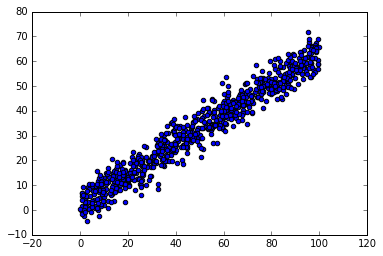

In [10]:
plt.scatter(X_train,Y_train)

## Eligo el modelo para el conjunto de entrenamiento, en este caso el Modelo de Regresión Lineal (MRL)

In [12]:
MRL = LinearRegression()

### Hago la regresión con el MRL

In [13]:
Model = MRL.fit(X_train,Y_train)

## Grafico cómo se ven los datos de prueba

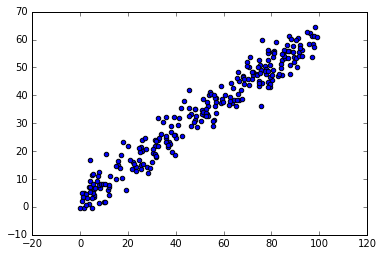

In [14]:
plt.scatter(X_test,Y_test)

### Grafico la "y" predecida con el conjunto de entrenamiento sobre el scatter plot de los datos de prueba

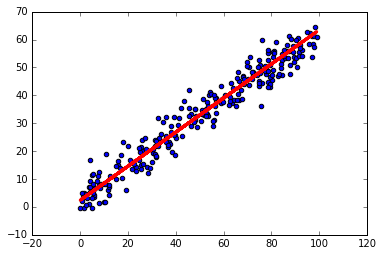

In [16]:
plt.scatter(X_test,Y_test)
plt.plot(X_test, MRL.predict(X_test), color = 'red', linewidth = 3)

## Cuales son los parámetros aprendidos con el MRL en el conjunto de entremamiento (75% de los datos)

In [25]:
print("El intercepto al origen: ")
print(Model.intercept_)

El intercepto al origen: 
[ 2.36584994]


In [26]:
print("El coeficiente asociado a la variable X: ")
print(Model.coef_)

El coeficiente asociado a la variable X: 
[[ 0.61094491]]


## Qué pasa cuando acutalizamos los coeficientes con base en la siguiente regla:
$ \mathbf w_{i} = w_{i} + \nu(y - \overrightarrow{y})x_{i} $


Empecemos con los coeficientes (pesos) ya predecidos por el MRL, primero es necesario convertirlos en valores (antes estaban declarados como listas)

In [27]:
w0 = MRL.intercept_[0]
w0

2.365849939331472

In [28]:
w1 = MRL.coef_[0][0]
w1

0.61094491055917721

Genero un vector (dependiente del coeficiente w1 encontrado por el MRL) con 200 valores para hacer la simulación

In [35]:
W = range(-100,100,1)+w1
W

array([-99.38905509, -98.38905509, -97.38905509, -96.38905509,
       -95.38905509, -94.38905509, -93.38905509, -92.38905509,
       -91.38905509, -90.38905509, -89.38905509, -88.38905509,
       -87.38905509, -86.38905509, -85.38905509, -84.38905509,
       -83.38905509, -82.38905509, -81.38905509, -80.38905509,
       -79.38905509, -78.38905509, -77.38905509, -76.38905509,
       -75.38905509, -74.38905509, -73.38905509, -72.38905509,
       -71.38905509, -70.38905509, -69.38905509, -68.38905509,
       -67.38905509, -66.38905509, -65.38905509, -64.38905509,
       -63.38905509, -62.38905509, -61.38905509, -60.38905509,
       -59.38905509, -58.38905509, -57.38905509, -56.38905509,
       -55.38905509, -54.38905509, -53.38905509, -52.38905509,
       -51.38905509, -50.38905509, -49.38905509, -48.38905509,
       -47.38905509, -46.38905509, -45.38905509, -44.38905509,
       -43.38905509, -42.38905509, -41.38905509, -40.38905509,
       -39.38905509, -38.38905509, -37.38905509, -36.38

In [31]:
print(W)

[-99.38905509 -98.38905509 -97.38905509 -96.38905509 -95.38905509
 -94.38905509 -93.38905509 -92.38905509 -91.38905509 -90.38905509
 -89.38905509 -88.38905509 -87.38905509 -86.38905509 -85.38905509
 -84.38905509 -83.38905509 -82.38905509 -81.38905509 -80.38905509
 -79.38905509 -78.38905509 -77.38905509 -76.38905509 -75.38905509
 -74.38905509 -73.38905509 -72.38905509 -71.38905509 -70.38905509
 -69.38905509 -68.38905509 -67.38905509 -66.38905509 -65.38905509
 -64.38905509 -63.38905509 -62.38905509 -61.38905509 -60.38905509
 -59.38905509 -58.38905509 -57.38905509 -56.38905509 -55.38905509
 -54.38905509 -53.38905509 -52.38905509 -51.38905509 -50.38905509
 -49.38905509 -48.38905509 -47.38905509 -46.38905509 -45.38905509
 -44.38905509 -43.38905509 -42.38905509 -41.38905509 -40.38905509
 -39.38905509 -38.38905509 -37.38905509 -36.38905509 -35.38905509
 -34.38905509 -33.38905509 -32.38905509 -31.38905509 -30.38905509
 -29.38905509 -28.38905509 -27.38905509 -26.38905509 -25.38905509
 -24.38905

Declaro el error como una lista vacia

In [39]:
error = []

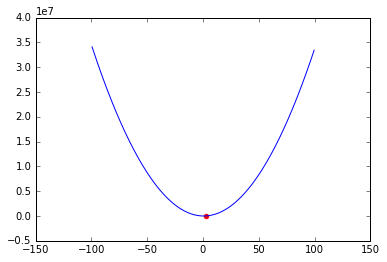

In [42]:
# Siempre se tiene que tener una lista vacia para recibir los errores cuadraticos medios predecidos
error = []
for i in W:
    y_pred = i*X_test + w0
    errorprediccion = np.subtract(y_pred,Y_test)
    errorprediccioncuadratico = errorprediccion**2
    error.append(np.mean(errorprediccioncuadratico))
# Grafico la función convexa para que relacióna los valores de W postulados con el error cuadrático medio de la prediccion    
plt.plot(W,error)
# Grafico el punto "optimizado" que encontre con el MRL
plt.scatter(w0,np.mean(((w1*base['X']+w0)-base['y'])**2),color = 'red')
# Efectivamente es el minimo

## Repito el Ejercicio con el archivo 2

In [44]:
base2 = pd.read_csv("regLin2.csv")
base2.describe()

,X,y
count,1029.000000,1029.000000
mean,50.757989,2137.739358
std,29.708336,1870.369352
min,0.230225,0.272241
25%,22.870956,342.135840
50%,53.951080,1774.199681
75%,76.256816,3658.103897
max,99.831593,7133.608688


In [46]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(base2[["X"]],base2[["y"]],train_size=0.75)
MRL2=LinearRegression()

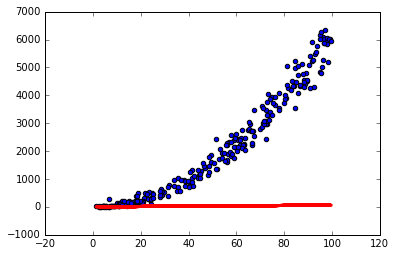

In [47]:
plt.scatter(X2_test,Y2_test)
plt.plot(X2_test,MRL.predict(X2_test),color='red',linewidth=3)

Los datos no parecen comportarse de forma lineal, por la vizualizacion se observa una posible relacion cuadratica, por lo que transformamos los datos para poder aplicar el MRL con $ \mathbf X^{2} $

In [48]:
X2_cuadratico = [[i**2]for i in X2_train['X']]
print(X2_train,X2_cuadratico)

(              X
868   83.167268
393   85.544475
129   23.356668
633   18.526139
561   25.201203
797   97.973612
538   60.489073
568   10.171327
805   44.856660
305    8.626674
288   18.588314
344   70.030989
820   86.633393
422   46.605646
175   21.976369
70    77.370760
584   38.573270
627   84.340545
582   39.114479
576   53.691933
591   18.303097
536   42.138412
752    7.362781
471   94.223203
606   92.920981
835   20.968549
753   52.688683
714   76.757970
206   57.682313
815   74.370664
...         ...
550    1.901176
43    31.676831
673    8.017877
722   65.878382
786   85.297017
492    2.008580
977   63.150621
406   87.173224
319   81.287231
610   84.344969
376   48.421188
397    9.060243
328    9.455189
653   89.943215
121   81.155791
824   84.330480
47    29.170694
85    91.314119
577   66.800831
686   92.163627
3     63.938261
906   31.400153
1014  43.069822
969   63.092401
543   96.940143
808   73.282963
928   34.404901
632    2.656099
163   66.294430
427    8.009052

[771 r

In [54]:
MRL2.fit(X2_cuadratico,Y2_train)
W=np.linspace(0,100,100)
W

array([   0.        ,    1.01010101,    2.02020202,    3.03030303,
          4.04040404,    5.05050505,    6.06060606,    7.07070707,
          8.08080808,    9.09090909,   10.1010101 ,   11.11111111,
         12.12121212,   13.13131313,   14.14141414,   15.15151515,
         16.16161616,   17.17171717,   18.18181818,   19.19191919,
         20.2020202 ,   21.21212121,   22.22222222,   23.23232323,
         24.24242424,   25.25252525,   26.26262626,   27.27272727,
         28.28282828,   29.29292929,   30.3030303 ,   31.31313131,
         32.32323232,   33.33333333,   34.34343434,   35.35353535,
         36.36363636,   37.37373737,   38.38383838,   39.39393939,
         40.4040404 ,   41.41414141,   42.42424242,   43.43434343,
         44.44444444,   45.45454545,   46.46464646,   47.47474747,
         48.48484848,   49.49494949,   50.50505051,   51.51515152,
         52.52525253,   53.53535354,   54.54545455,   55.55555556,
         56.56565657,   57.57575758,   58.58585859,   59.59595

In [55]:
print(W)

[   0.            1.01010101    2.02020202    3.03030303    4.04040404
    5.05050505    6.06060606    7.07070707    8.08080808    9.09090909
   10.1010101    11.11111111   12.12121212   13.13131313   14.14141414
   15.15151515   16.16161616   17.17171717   18.18181818   19.19191919
   20.2020202    21.21212121   22.22222222   23.23232323   24.24242424
   25.25252525   26.26262626   27.27272727   28.28282828   29.29292929
   30.3030303    31.31313131   32.32323232   33.33333333   34.34343434
   35.35353535   36.36363636   37.37373737   38.38383838   39.39393939
   40.4040404    41.41414141   42.42424242   43.43434343   44.44444444
   45.45454545   46.46464646   47.47474747   48.48484848   49.49494949
   50.50505051   51.51515152   52.52525253   53.53535354   54.54545455
   55.55555556   56.56565657   57.57575758   58.58585859   59.5959596
   60.60606061   61.61616162   62.62626263   63.63636364   64.64646465
   65.65656566   66.66666667   67.67676768   68.68686869   69.6969697
   70.70

Ahora no se uso la función range sino la función linspace para generar una serie de valores W para la simulación

En esta ocasion en lugar de generar una funcion con la instruccion "for" se vectorizara la operacion

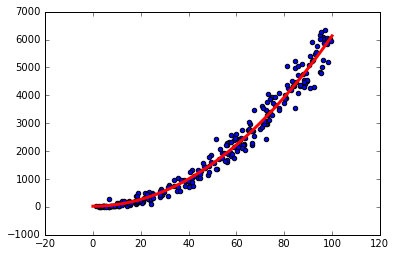

In [57]:
plt.scatter(X2_test,Y2_test)
plt.plot(W, MRL2.predict([[i**2] for i in W]), color='red', linewidth=3)

Nota que en esta ocasion el MRL con datos transformados si logro capturar la tendencia del conjunto de prueba

## Repetimos el proceso con el tercer conjunto de datos

In [59]:
base3 = pd.read_csv("regLin3.csv")
base3.describe()

,X,y
count,1029.000000,1029.000000
mean,50.163569,-0.024165
std,29.403168,0.701349
min,0.083795,-1.000000
25%,24.059073,-0.727235
50%,50.102445,-0.003449
75%,75.384381,0.665711
max,99.997174,0.999984


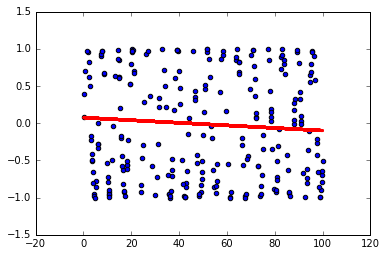

In [60]:
X3_train,X3_test,Y3_train,Y3_test = train_test_split(base3[["X"]],base3[["y"]], train_size = 0.75)
MRL3=LinearRegression()
Model3=MRL3.fit(X3_train,Y3_train)
plt.scatter(X3_test,Y3_test)
plt.plot(X3_test, MRL3.predict(X3_test),color='red',linewidth=3)

### Nota que parece que los datos no pueden ser aproximados por el MRL (no se ve una relación lineal entre ellos)
¿Qué pasa cuando los transformamos de forma "adecuada"?

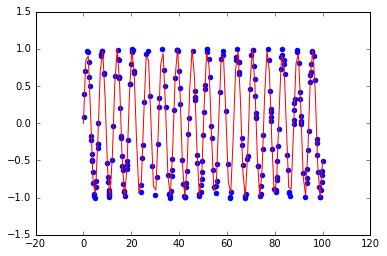

In [61]:
MRL3.fit([[mth.sin(i)] for i in X3_train['X']],Y3_train)
# Generamos los valores de W
W=np.linspace(0,100,100)
W_transformed=[[mth.sin(i)]for i in W]
plt.scatter(X3_test, Y3_test, color='blue')
plt.plot(x,MRL3.predict(W_transformed),color = 'red', linewidth = 1)


### Nota que pudimos usar un MRL para estimar replicar la linea de tendencia entre datos y, X con tendencía no lineal